
# Collecting insights from the Twitter account @dog_rates


<img src="https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_400x400.jpg" width="300" height="300" />
[(Font: WeRateDogs)](https://twitter.com/dog_rates)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 7 million followers and has received international media coverage.

>We received via email exclusively to use in our project one archive containing the basic tweet data for all 5K+ of their tweets as they stood on August 1,2017.

>In this project we will collect, wrangle and analyse data from @dog_rates twitter account creating interesting and trustworthy analyses and visualizations.


In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import tweepy
# matplot magic line
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this segment we will Gather, Asses and Clean the Data.

### Gathering Data

#### Reading twitter-archive-enhanced.csv file

In [2]:
#gathering Data from the CSV Archieve with pandas
tweets = pd.read_csv('twitter-archive-enhanced.csv')
tweets.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Downloading image_predictions.tsv hosted on Udacity's servers

Using requests we will save the file, then we will open it with pandas.

In [3]:
#setting url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
#getting the archieve in memory
r = requests.get(url)
r.status_code

200

In [4]:
#opening and saving the archive content
with open('predictions.tsv', 'wb') as f:
    f.write(r.content)

In [5]:
#gathering Data from the TSV Archieve with pandas
predictions = pd.read_csv('predictions.tsv', sep= '\t')
predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Getting more informations for tweets table from Twitter

We will use tweepy to get the aditional information of the tweets

In [6]:
#importing the class where the TWEEPY Conf is in. (Parameters we use below)
import tweepyconf as tpc

In [7]:
#To Run you sould take the tpc. out
#autentification
auth = tweepy.OAuthHandler(tpc.CONSUMER_KEY, tpc.CONSUMER_SECRET)
auth.set_access_token(tpc.OAUTH_TOKEN, tpc.OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

api.wait_on_rate_limit = True
api.wait_on_rate_limit_notify = True

In [8]:
tweets_ids_deleted = []
tweets_ids_error = []
with open('tweet_json.txt', 'w', encoding='utf-8') as f:
    #Making the tweet_id for loop
    for tid in tweets.tweet_id:
        try:
            tweet = api.get_status(tid, tweet_mode='extended')
            f.writelines(json.dumps(tweet._json) + '\n')
        except tweepy.TweepError as e:
            code = e.api_code
            #TWEEPY ERROR CODE 144 (TWEET DELETED ERROR: "'No status found with that ID.'")
            if code == 144:
                tweets_ids_deleted.append(tid)
            else:
                tweets_ids_error.append(tid)
            continue
        except:
            tweets_ids_error.append(tid)
            continue
    print('Total Errors: ' + str(len(tweets_ids_error)))
    print('Total Deleted: ' + str(len(tweets_ids_deleted)))

Rate limit reached. Sleeping for: 328
Rate limit reached. Sleeping for: 198


Total Errors: 14
Total Deleted: 13


Retrying to gather erros and append then into the end of the file.

In [9]:
tweets_ids_error = []
with open('tweet_json.txt', 'a', encoding='utf-8') as f:
    #Making the tweet_id for loop
    for tid in tweets_ids_error:
        try:
            tweet = api.get_status(tid, tweet_mode='extended')
            f.writelines(json.dumps(tweet._json) + '\n')
        except tweepy.TweepError as e:
            code = e.api_code
            if code == 144:
                tweets_ids_deleted.append(tid)
            else:
                print('code error: ' + str(code))
                tweets_ids_error.append(tid)
            continue
        except:
            tweets_ids_error.append(tid)
            continue
    print('Total Errors: ' + str(len(tweets_ids_error)))
    print('Total Deleted: ' + str(len(tweets_ids_deleted)))

Total Errors: 0
Total Deleted: 13


In [10]:
tweets_ids_deleted

[888202515573088257,
 873697596434513921,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368]

Opening tweet_json.txt with pandas

In [11]:
tweets_complement = pd.read_json('tweet_json.txt', lines=True)
tweets_complement.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38589,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8531,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33086,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6270,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Assessing Data
In this segment we will look through the data frames to find problems, and list them in the problem section.

* Let's look into the tweets Data frame

In [12]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


The four last columns are dogs characteristics and should be just one column, besides the 'None' value should be NULL.
There are some columns we won't use, so we can drop these columns.
The source column should not have the http pattern.

In [13]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Timestamp is not a date object
There are missing values from expanded_urls

In [14]:
tweets.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [15]:
tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
pd.options.display.max_colwidth = 140
tweets[tweets.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://...",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/9...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP http...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://...",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDND...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/

We can see that are wrong denominators and numerators.
We should notice there are replies for the tweets and retweets too.

In [17]:
sum(tweets.duplicated())

0

In [18]:
tweets.name.nunique

<bound method IndexOpsMixin.nunique of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351     

* Let's look into the predictions Data frame

In [19]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

There are equal JPEG URLs

In [22]:
sum(predictions.duplicated())

0

In [23]:
predictions[predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [24]:
predictions[predictions.jpg_url == 'https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True


As we can see, the only diference in these duplicated roles is the tweet_id.
Also, we can notice there are predictions the none of them are dogs.

* Let's look into the tweets_complement Data frame

In [25]:
tweets_complement.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'i...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGK...",38589,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,NaN,NaN,NaN,NaN,8531,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', '..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'i...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DG...",33086,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/...",NaN,...,NaN,NaN,NaN,NaN,6270,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', '..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'i...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DG...",24911,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/w...,NaN,...,NaN,NaN,NaN,NaN,4156,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', '..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'i...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_...",42012,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,...,NaN,NaN,NaN,NaN,8662,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', '..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89132755194...","{'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF...",40142,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWe...",NaN,...,NaN,NaN,NaN,NaN,9411,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', '..."


There are lots of columns we won't use

In [26]:
tweets_complement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2329 non-null datetime64[ns]
display_text_range               2329 non-null object
entities                         2329 non-null object
extended_entities                2055 non-null object
favorite_count                   2329 non-null int64
favorited                        2329 non-null bool
full_text                        2329 non-null object
geo                              0 non-null float64
id                               2329 non-null int64
id_str                           2329 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

Lot's of columns with null values

#### Data Problems

* Tidiness

        ** drop unused/repeated columns from tweets and tweets_complement tables.
        ** unify columns doggo, floofer, pupper, puppo into one column in tweets since it could be 1 column for the characteristics of the dog.
        ** unify tweets dataframe with tweets_complement dataframe since the information are for the same objective from    the same tweet.
        
        

* Quality

        ** There are tweets that have already been deleted, so we could not recover complements information.
        ** in_reply_to_status_id and retweeted_status_id not a int
        ** There are replies and retweets in the middle of tweets dataframe.
        ** Timestamp not in time format.
        ** Fix wrong numerators and denominators, the data mining recovery some wrong data for them.
        ** Make Jpeg URLs unique (Duplicated lines), we don't have a need to keep more than one analysis for each picture.
        ** Wrong dogs names like "such", "the", "a" and "an"
        ** Missing values for favorite_count, retweet_count after join tweets with tweets_complement
        


### Cleaning Data
In this segment we will clean the data and solve the problems above

Let's first make a copy of each dataframe

In [64]:
tweets_clean = tweets.copy()
predictions_clean = predictions.copy()
tweets_complement_clean = tweets_complement.copy()

#### Tidiness

> 1 - take repeated columns or columns we won't use from `tweets` and  `tweets_complement` dataframe out

##### Define

Drop the columns

##### Code

In [65]:
tweets_clean = tweets_clean.drop(['source', 'in_reply_to_user_id','retweeted_status_user_id'
                                  ,'retweeted_status_timestamp'], axis=1)

In [66]:
tweets_complement_clean = tweets_complement_clean.drop(['contributors','coordinates','display_text_range','entities',
                                                        'extended_entities','full_text','geo','id_str','in_reply_to_screen_name',
                                                        'in_reply_to_status_id','in_reply_to_status_id_str',
                                                        'in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status',
                                                        'lang','place','possibly_sensitive','possibly_sensitive_appealable',
                                                        'quoted_status','quoted_status_id','quoted_status_id_str',
                                                        'quoted_status_permalink','source','truncated','user',
                                                        'retweeted_status'], axis=1)

##### Test

In [67]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
timestamp                2356 non-null object
text                     2356 non-null object
retweeted_status_id      181 non-null float64
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 239.4+ KB


In [68]:
tweets_complement_clean.head(1)

,created_at,favorite_count,favorited,id,retweet_count,retweeted
0,2017-08-01 16:23:56,38589,False,892420643555336193,8531,False


> 2 - Four columns `doggo`, `floofer`, `pupper`, `puppo` should be values in 1 column

##### Define

We'll create a new column with the result of the other columns, them clean it and drop the unified columns.

##### Code

In [69]:
tweets_clean['characteristic'] = tweets['doggo'] + tweets['floofer'] + tweets['pupper'] + tweets['puppo']
tweets_clean.characteristic = tweets_clean.characteristic.replace("None","", regex=True)
tweets_clean = tweets_clean.drop(['doggo', 'floofer','pupper','puppo'], axis=1)

##### Test

In [70]:
tweets_clean.sample(5)

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,characteristic
303,836397794269200385,NaN,2017-02-28 02:09:08 +0000,RT @dog_rates: This is Buddy. He ran into a glass door once. Now he's h*ckin skeptical. 13/10 empowering af (vid by Brittany Gaunt) http...,8.178278e+17,https://twitter.com/dog_rates/status/817827839487737858/video/1,13,10,Buddy,
1308,707297311098011648,NaN,2016-03-08 20:09:54 +0000,This is Cassie. She can go from sweet to scary af in a matter of seconds. 10/10 points deducted for cats on pajamas https://t.co/B6dmZmJBdK,NaN,"https://twitter.com/dog_rates/status/707297311098011648/photo/1,https://twitter.com/dog_rates/status/707297311098011648/photo/1",10,10,Cassie,
1204,716080869887381504,NaN,2016-04-02 01:52:38 +0000,Here's a super majestic doggo and a sunset 11/10 https://t.co/UACnoyi8zu,NaN,"https://twitter.com/dog_rates/status/716080869887381504/photo/1,https://twitter.com/dog_rates/status/716080869887381504/photo/1",11,10,None,doggo
565,802265048156610565,7.331095e+17,2016-11-25 21:37:47 +0000,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggopupper
2166,669363888236994561,NaN,2015-11-25 03:56:01 +0000,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,NaN,https://twitter.com/dog_rates/status/669363888236994561/photo/1,10,10,None,


> 3 - Let's merge the `tweets_clean` with `tweets_complement_clean` dataframes

##### Define

Merge the dataframes with left join

##### Code

In [71]:
tweets_clean = tweets_clean.merge(tweets_complement_clean, left_on='tweet_id', right_on='id', how = 'left')

##### Test

In [72]:
#drop the duplicated column (tweets_id = id)
tweets_clean = tweets_clean.drop(['id'], axis=1)
tweets_clean.sample()

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,characteristic,created_at,favorite_count,favorited,retweet_count,retweeted
1314,706901761596989440,NaN,2016-03-07 17:58:08 +0000,This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,NaN,https://twitter.com/dog_rates/status/706901761596989440/photo/1,3,10,Elliot,,2016-03-07 17:58:08,2202.0,False,654.0,False


#### Quality

> 1 - Tweets that have already been deleted

##### Define

Delete these deleted tweets from `tweets_clean`

##### Code

In [100]:
for tid in tweets_ids_deleted:
    tweets_clean = tweets_clean[tweets_clean.tweet_id != tid]

##### Test

In [101]:
sum(tweets_clean.tweet_id.isin(tweets_ids_deleted))

0

> 2 - Erroneous datatype from timestamp

##### Define

Change timestamp to data type

##### Code

In [75]:
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp)

##### Test

In [76]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2343 non-null int64
in_reply_to_status_id    78 non-null float64
timestamp                2343 non-null datetime64[ns]
text                     2343 non-null object
retweeted_status_id      169 non-null float64
expanded_urls            2284 non-null object
rating_numerator         2343 non-null int64
rating_denominator       2343 non-null int64
name                     2343 non-null object
characteristic           2343 non-null object
created_at               2329 non-null datetime64[ns]
favorite_count           2329 non-null float64
favorited                2329 non-null object
retweet_count            2329 non-null float64
retweeted                2329 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(6)
memory usage: 292.9+ KB


> 3 - Erroneous datatype from in_reply_to_status_id and retweeted_status_id

##### Define

Change in_reply_to_status_id and retweeted_status_id to int

##### Code

In [79]:
tweets_clean.in_reply_to_status_id = tweets_clean.in_reply_to_status_id.fillna(0).astype(int)
tweets_clean.retweeted_status_id = tweets_clean.retweeted_status_id.fillna(0).astype(int)

In [89]:
tweets_clean.in_reply_to_status_id = tweets_clean.in_reply_to_status_id.replace(0,np.nan)
tweets_clean.retweeted_status_id = tweets_clean.retweeted_status_id.replace(0,np.nan)

##### Test

In [90]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2343 non-null int64
in_reply_to_status_id    78 non-null float64
timestamp                2343 non-null datetime64[ns]
text                     2343 non-null object
retweeted_status_id      169 non-null float64
expanded_urls            2284 non-null object
rating_numerator         2343 non-null int64
rating_denominator       2343 non-null int64
name                     2343 non-null object
characteristic           2343 non-null object
created_at               2329 non-null datetime64[ns]
favorite_count           2329 non-null float64
favorited                2329 non-null object
retweet_count            2329 non-null float64
retweeted                2329 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(6)
memory usage: 372.9+ KB


> 4 - deleting the replies and retweets from the dataframe

##### Define

drop lines where the column in_reply_to_status_id and retweeted_status_id is a non-null value

##### Code

In [91]:
tweets_clean[np.isnan(tweets_clean.in_reply_to_status_id)]

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,characteristic,created_at,favorite_count,favorited,retweet_count,retweeted
0,892420643555336193,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,2017-08-01 16:23:56,38589.0,False,8531.0,False
1,892177421306343426,NaN,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/...",NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,2017-08-01 00:17:27,33086.0,False,6270.0,False
2,891815181378084864,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/w...,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,2017-07-31 00:18:03,24911.0,False,4156.0,False
3,891689557279858688,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,2017-07-30 15:58:51,42012.0,False,8662.0,False
4,891327558926688256,NaN,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWe...",NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,2017-07-29 16:00:24,40142.0,False,9411.0,False
5,891087950875897856,NaN,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWe...,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,,2017-07-29 00:08:17,20130.0,False,3116.0,False
6,890971913173991426,NaN,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4h...,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,,2017-07-28 16:27:12,11799.0,False,2074.0,False
7,890729181411237888,NaN,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nO...,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,,2017-07-28 00:22:40,65215.0,False,18910.0,False
8,890609185150312448,NaN,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/...,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,,2017-07-27 16:25:51,27670.0,False,4270.0,False
9,890240255349198849,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate ht...,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,2017-07-26 15:59:51,31791.0,False,7427.0,False


In [92]:
tweets_clean = tweets_clean[np.isnan(tweets_clean.in_reply_to_status_id)]
tweets_clean = tweets_clean[np.isnan(tweets_clean.retweeted_status_id)]

##### Test

In [93]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2096 non-null int64
in_reply_to_status_id    0 non-null float64
timestamp                2096 non-null datetime64[ns]
text                     2096 non-null object
retweeted_status_id      0 non-null float64
expanded_urls            2093 non-null object
rating_numerator         2096 non-null int64
rating_denominator       2096 non-null int64
name                     2096 non-null object
characteristic           2096 non-null object
created_at               2083 non-null datetime64[ns]
favorite_count           2083 non-null float64
favorited                2083 non-null object
retweet_count            2083 non-null float64
retweeted                2083 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(6)
memory usage: 262.0+ KB


> 5 - Wrong rating_denominator and numerators. In some cases the text mining could get the wrong numbers. A clear path to it is see where rating_denominator differs 10.

So we can check and fix it


##### Define

Replace the wrong numbers with the right ones

##### Code

In [44]:
tweets_clean[tweets_clean.rating_denominator != 10]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,characteristic,created_at,favorite_count,favorited,retweet_count,retweeted
433,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://...",84,70,None,,2017-01-15 17:52:40,13169.0,False,3583.0,False
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/9...,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,,2016-12-19 23:06:23,5789.0,False,1602.0,False
902,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,,2016-07-28 01:00:57,5161.0,False,2456.0,False
1068,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDND...","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://...",9,11,None,,2016-06-08 02:41:38,37000.0,False,14524.0,False
1120,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,,2016-05-13 16:15:54,4077.0,False,1384.0,False
1165,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,,2016-04-21 02:25:47,4366.0,False,1708.0,False
1202,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,,2016-04-03 01:36:11,2503.0,False,237.0,False
1228,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,,2016-03-27 01:29:02,2996.0,False,806.0,False
1254,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,,2016-03-18 02:46:49,2453.0,False,612.0,False
1274,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/...",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,,2016-03-14 02:04:08,2560.0,False,693.0,False


In [45]:
tweets_clean[tweets_clean.rating_numerator > 100]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,characteristic,created_at,favorite_count,favorited,retweet_count,retweeted
902,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,,2016-07-28 01:00:57,5161.0,False,2456.0,False
979,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,,2016-07-04 15:00:45,5484.0,False,2693.0,False
1120,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,,2016-05-13 16:15:54,4077.0,False,1384.0,False
1635,684222868335505415,2016-01-05 04:00:18,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJ...,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,,2016-01-05 04:00:18,4105.0,False,1512.0,False
1779,677716515794329600,2015-12-18 05:06:23,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,,2015-12-18 05:06:23,3219.0,False,1056.0,False
2074,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,,2015-11-29 05:52:33,25374.0,False,9215.0,False


In [46]:
tweets_clean[tweets_clean.rating_numerator > 100]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,characteristic,created_at,favorite_count,favorited,retweet_count,retweeted
902,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,,2016-07-28 01:00:57,5161.0,False,2456.0,False
979,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,,2016-07-04 15:00:45,5484.0,False,2693.0,False
1120,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,,2016-05-13 16:15:54,4077.0,False,1384.0,False
1635,684222868335505415,2016-01-05 04:00:18,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJ...,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,,2016-01-05 04:00:18,4105.0,False,1512.0,False
1779,677716515794329600,2015-12-18 05:06:23,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,,2015-12-18 05:06:23,3219.0,False,1056.0,False
2074,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,,2015-11-29 05:52:33,25374.0,False,9215.0,False


wrong
tweets_id - num - dem

666287406224695296 - 9 - 10

682962037429899265 - 10 - 10

716439118184652801 - 11 - 10

722974582966214656 - 13 - 10

740373189193256964 - 14 - 10

749981277374128128 - 176 - 10 (He'd probably press a extra number)

In [47]:
tweets_clean.ix[tweets_clean[tweets_clean.tweet_id == 666287406224695296].index,'rating_numerator']=9
tweets_clean.ix[tweets_clean[tweets_clean.tweet_id == 666287406224695296].index,'rating_denominator']=10

tweets_clean.ix[tweets_clean[tweets_clean.tweet_id == 682962037429899265].index,'rating_numerator']=10
tweets_clean.ix[tweets_clean[tweets_clean.tweet_id == 682962037429899265].index,'rating_denominator']=10

tweets_clean.ix[tweets_clean[tweets_clean.tweet_id == 716439118184652801].index,'rating_numerator']=11
tweets_clean.ix[tweets_clean[tweets_clean.tweet_id == 716439118184652801].index,'rating_denominator']=10

tweets_clean.ix[tweets_clean[tweets_clean.tweet_id == 722974582966214656].index,'rating_numerator']=13
tweets_clean.ix[tweets_clean[tweets_clean.tweet_id == 722974582966214656].index,'rating_denominator']=10

tweets_clean.ix[tweets_clean[tweets_clean.tweet_id == 740373189193256964].index,'rating_numerator']=14
tweets_clean.ix[tweets_clean[tweets_clean.tweet_id == 740373189193256964].index,'rating_denominator']=10

tweets_clean.ix[tweets_clean[tweets_clean.tweet_id == 749981277374128128].index,'rating_numerator']=176

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [48]:
tweets_clean[tweets_clean.tweet_id == 749981277374128128]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,characteristic,created_at,favorite_count,favorited,retweet_count,retweeted
979,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,176,10,Atticus,,2016-07-04 15:00:45,5484.0,False,2693.0,False


> 6 - There shouldn't be repeated jpegs in the predictions table 

##### Define

Deleted the duplicated rows, letting just 1 from each jpeg

##### Code

In [49]:
predictions_clean = predictions_clean.drop_duplicates(['jpg_url'], keep='first')

In [50]:
predictions_clean.nunique()

tweet_id    2009
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

> 7 - Wrong names like "such", "the", "a" and "an" 

##### Define

Transform this names in None

##### Code

In [51]:
tweets_clean.name.replace(["such","a","an","the"], ["None","None","None","None"], inplace= True)

##### Test

In [52]:
tweets_clean[tweets_clean.name == "an"].name 

Series([], Name: name, dtype: object)

> 8 - Missing values for favorite_count, retweet_count

##### Define

Let's set these values the mean of these counts

##### Code

In [103]:
tweets_clean.favorite_count.replace(np.nan,tweets_clean.favorite_count.mean(),inplace=True)
tweets_clean.retweet_count.replace(np.nan,tweets_clean.retweet_count.mean(),inplace=True)

##### Test

In [105]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2096 non-null int64
in_reply_to_status_id    0 non-null float64
timestamp                2096 non-null datetime64[ns]
text                     2096 non-null object
retweeted_status_id      0 non-null float64
expanded_urls            2093 non-null object
rating_numerator         2096 non-null int64
rating_denominator       2096 non-null int64
name                     2096 non-null object
characteristic           2096 non-null object
created_at               2083 non-null datetime64[ns]
favorite_count           2096 non-null float64
favorited                2083 non-null object
retweet_count            2096 non-null float64
retweeted                2083 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(6)
memory usage: 262.0+ KB


#### Saving the cleaning data

In [53]:
tweets_clean.to_csv("twitter_archive_master.csv")
predictions_clean.to_csv("predictions_archieve_master.csv")

<a id='eda'></a>
## Exploratory Data Analysis

In this segment we will explore and analyse the data to insights.

In [54]:
tweets_clean.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.096000e+03,2096.000000,2096.000000,2083.000000,2083.000000
mean,7.365511e+17,11.419370,10.427958,8883.887182,2754.985118
std,6.711671e+16,12.512645,6.584321,12431.160852,4586.944003
min,6.660209e+17,0.000000,7.000000,80.000000,13.000000
25%,6.768177e+17,10.000000,10.000000,1994.500000,616.500000
50%,7.097095e+17,11.000000,10.000000,4077.000000,1352.000000
75%,7.877408e+17,12.000000,10.000000,11195.500000,3167.500000
max,8.924206e+17,420.000000,170.000000,142606.000000,76870.000000


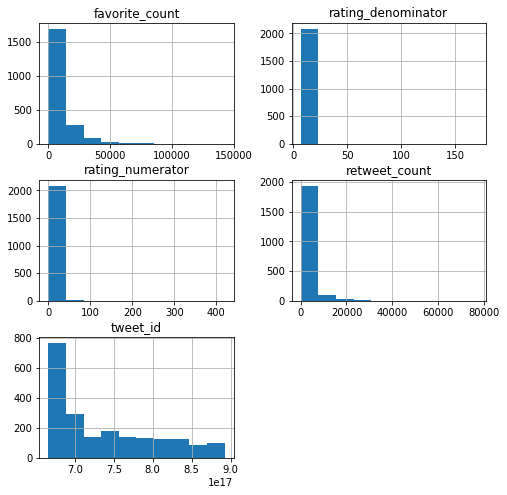

In [55]:
tweets_clean.hist(figsize=[8,8]);

In [56]:
import datetime

In [57]:
tweets_clean['month_year'] = tweets_clean.timestamp.dt.to_period('M')

In [58]:
tweets_by_month = tweets_clean.groupby(by = ['month_year']).mean()
tweets_by_month['rate_percentage'] = (tweets_by_month.rating_numerator/tweets_by_month.rating_denominator)*100

In [59]:
tweets_by_month = tweets_by_month.drop(['tweet_id','rating_numerator','rating_denominator'], axis=1)

In [60]:
tweets_by_month.head()

,favorite_count,retweet_count,rate_percentage
month_year,,,
2015-11,1268.972789,540.823129,103.108108
2015-12,3532.181572,1521.027100,97.333333
2016-01,4146.016393,1624.196721,102.797927
2016-02,4118.421488,1520.752066,102.265625
2016-03,4563.166667,1704.121212,104.768212


### Let's explore the evolution of favorites/retweeted of Dogs_rate by time

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


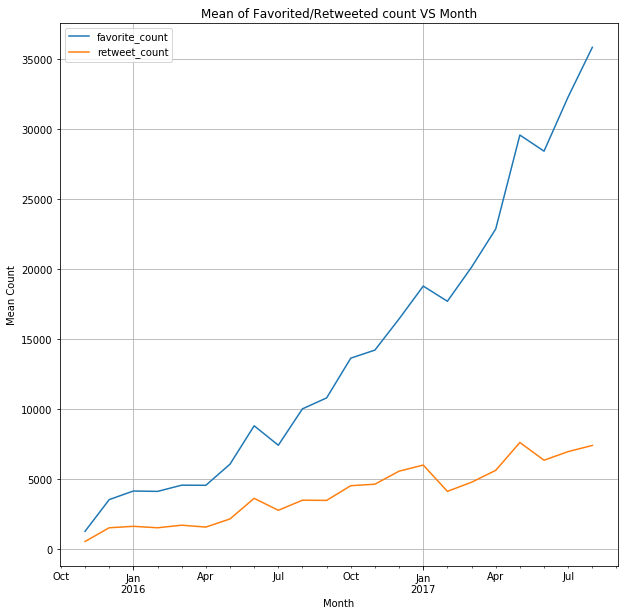

In [61]:
tweets_by_month.plot(y=['favorite_count','retweet_count'], figsize=[10,10]);
plt.title("Mean of Favorited/Retweeted count VS Month");
plt.ylabel("Mean Count");
plt.xlabel("Month");
plt.grid('on');

> As we can see in the graph above, by the mean of favorited/retweeted tweets by month the twiiter account is growing fast, in jul-2017 his tweets had 17,5 times favorited counts more than in nov-2015.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


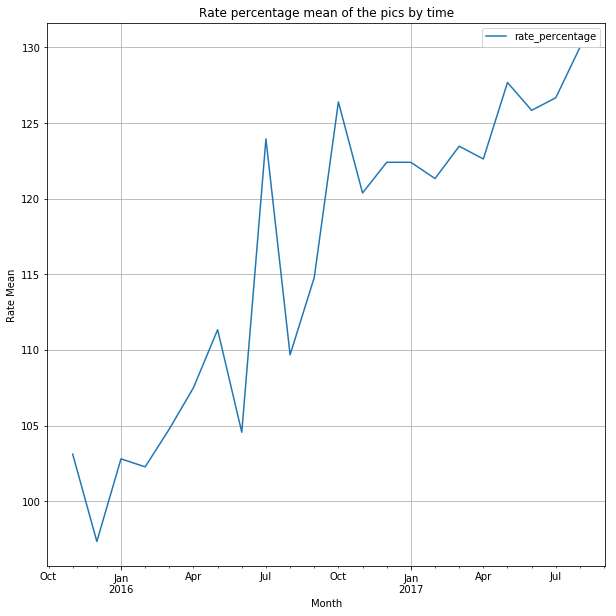

In [62]:
tweets_by_month.plot(y=['rate_percentage'], figsize=[10,10]);
plt.title("Rate percentage mean of the pics by time");
plt.ylabel("Rate Mean");
plt.xlabel("Month");
plt.grid('on');

By the beggining of this twiiter the rates were lower than today, it is increasing by time.

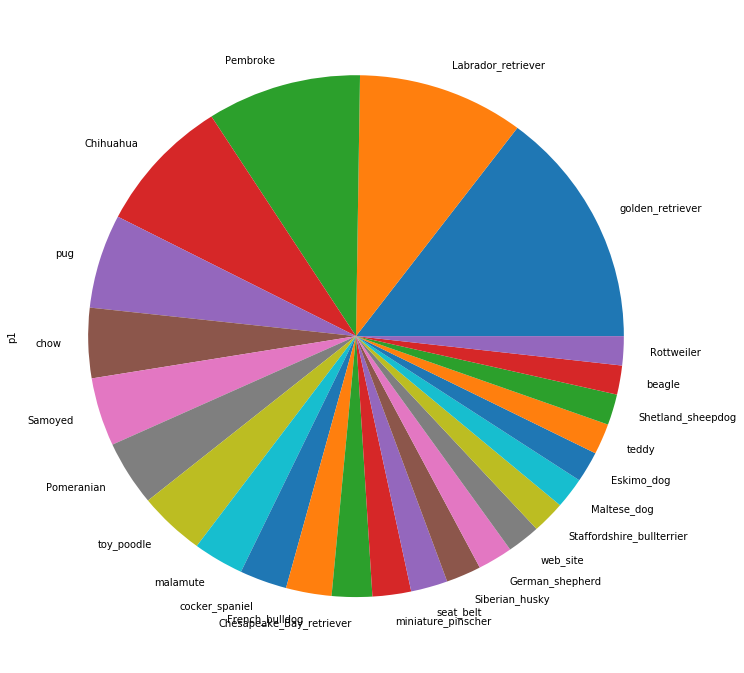

In [63]:
predictions_clean.p1.value_counts()[:25].plot(kind= 'pie',figsize = [12,12]);

Assuming the predictions are correct we can see that most tweets talk about Golden Retrieves, Labredors, Pembrokes and Chihuahuas, while other races are less commons.

<a id='conclusions'></a>
## Conclusion



The twiiter account dogs rate grew a lot since the beginig, more than 17 times for favorited number for tweets and 5 times for retweeted posts.

Most of the pictures the account rate are retrievers, by this information we can assume most people who sent them pics for them to rate have retrievers.

He is being more affected by the dogs cuteness over time, that's the reason the rates are getting higher.